# HP Python Introduction Mini Project

The following code loads the olympics dataset (olympics.csv), which was derrived from the Wikipedia entry on [All Time Olympic Games Medals](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table), and does some basic data cleaning. 

The columns are organized as # of Summer games, Summer medals, # of Winter games, Winter medals, total # number of games, total # of medals. Use this dataset to answer the questions below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import required library and the dataset (index_col = 0, skiprows=1)
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/olympics.csv', index_col = 0, skiprows = 1)

In [ ]:
# Observe the data using .head()
df.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [ ]:
# Observe the data index
df.index

Index(['Afghanistan (AFG)', 'Algeria (ALG)', 'Argentina (ARG)',
       'Armenia (ARM)', 'Australasia (ANZ) [ANZ]', 'Australia (AUS) [AUS] [Z]',
       'Austria (AUT)', 'Azerbaijan (AZE)', 'Bahamas (BAH)', 'Bahrain (BRN)',
       ...
       'Uzbekistan (UZB)', 'Venezuela (VEN)', 'Vietnam (VIE)',
       'Virgin Islands (ISV)', 'Yugoslavia (YUG) [YUG]',
       'Independent Olympic Participants (IOP) [IOP]', 'Zambia (ZAM) [ZAM]',
       'Zimbabwe (ZIM) [ZIM]', 'Mixed team (ZZX) [ZZX]', 'Totals'],
      dtype='object', length=147)

In [ ]:
# Replace df by dropping the last row and store in as df2
df.drop(df.tail(1).index,inplace=True)
df2 = df.copy()
df2

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia (YUG) [YUG],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
Zambia (ZAM) [ZAM],12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


In [ ]:
# From now on, only use df2
# Clean the colun name using for loop and if statement
# Column name '01' indicates as 'Gold', '02' indicates as 'Silver', '03' indicates as 'Bronze'. 
# Rename the columns name accordingly
# Replace '№' to '#', hint: You may copy "№" as typing is challenging.
for i in df2.columns :
  if i[:2] == '01':
    df2.columns = df2.columns.str.replace("01 !", "Gold")
    #print(i)
  elif i[:2] == '02':
    df2.columns = df2.columns.str.replace("02 !", "Silver")
    #print(i)
  elif i[:2] == '03':
    df2.columns = df2.columns.str.replace("03 !", "Bronze")
    #print(i)
  elif i[:1] == '№':
    df2.columns = df2.columns.str.replace("№", "#")
    #print(i)

df2

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia (YUG) [YUG],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
Zambia (ZAM) [ZAM],12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


In [ ]:
# split the index by '(' in a new variable 'names_ids'
names_ids = df2.index.str.split('(')
names_ids
# Replace the index to new variable 'names_ids', but only take the full name on the country that we have cleaned
df2.index = names_ids.str[0]
df2

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
Independent Olympic Participants,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
Zambia,12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
Zimbabwe,12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


In [ ]:
# Use back the 'names_ids' second part and clean up the data so that it only consist of the first 3 characters
names_ids.str[1].str[:3]
# Create a new column 'ID' in the data frame which consist of the 3 characters after the parathesis,
# i.e. Australasia (ANZ), ID = ANZ
df2['ID'] = names_ids.str[1].str[:3]
df2

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,16,26,29,28,83,14,0,3,1,4,30,26,32,29,87,YUG
Independent Olympic Participants,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3,IOP
Zambia,12,0,1,1,2,0,0,0,0,0,12,0,1,1,2,ZAM
Zimbabwe,12,3,4,1,8,1,0,0,0,0,13,3,4,1,8,ZIM


In [ ]:
## Expected outcome for your reference, don't run this script, else the expected outcome will be replaced !!!
# df.head()

In [ ]:
# Check the data size
size = df2.size
shape = df2.shape
print("The size of df2 is {} and the dimension is {}".format(size, shape))

The size of df2 is 2336 and the dimension is (146, 16)


### Question 1
Which country has won the most gold medals in summer games?

*This function should return a single string value.*

In [ ]:
# Use max pre-defined function in pandas and mask to display the outcome


In [ ]:
def most_country():
  gold = df2["Gold"]
  max_index = gold.idxmax()
  return print(max_index)

most_country()

United States 


### Question 2
Which country had the biggest difference between their summer and winter gold medal counts?

*This function should return a single string value.*

In [ ]:
# Create a new column "Diff" can help you to get the max
df2['Diff'] = abs(df2['Gold'] - df2['Gold.1'])
df2.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID,Diff
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG,0
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG,5
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG,18
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM,1
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ,3


In [ ]:
def big_diff():
  big_diff = df2["Diff"]
  max_index = big_diff.idxmax()
  return print(max_index)

big_diff()

United States 


### Question 3
Which country has the biggest difference between their summer gold medal counts and winter gold medal counts relative to their total gold medal count? 

$$\frac{Summer~Gold - Winter~Gold}{Total~Gold}$$

Only include countries that have won at least 1 gold in both summer and winter.



In [ ]:
# Create a copy of original dataset that only include contries that have won at least 1 gold in both summer and winter
one_gold = df2.copy()
one_gold = one_gold[(one_gold['Gold']>=1) & (one_gold['Gold.1'] >= 1)]
one_gold.shape

(36, 17)

In [ ]:
# Create a new column 'Relative_Diff' that use the above formula and answer the question
def relative_diff():
  one_gold['relative_diff'] = one_gold['Diff']/one_gold['Gold.2']
  relative_diff = one_gold['relative_diff']
  max_index = relative_diff.idxmax()
  return print(max_index)

relative_diff()

Bulgaria 


### Question 4
Write a function that creates a Series called "Points" which is a weighted value where each gold medal (`Gold.2`) counts for 3 points, silver medals (`Silver.2`) for 2 points, and bronze medals (`Bronze.2`) for 1 point. The function should return only the column (a Series object) which you created.

*This function should return a Series named `Points` of length 146*

In [ ]:
df2.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID,Diff
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG,0
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG,5
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG,18
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM,1
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ,3


In [ ]:
# Create your function here
def total_point():
  points = np.zeros(len(df2))
  points += df2['Gold.2']*3
  points += df2['Silver.2']*2
  points += df2['Bronze.2']*1
  return points
points = total_point()
points

Afghanistan                            2.0
Algeria                               27.0
Argentina                            130.0
Armenia                               16.0
Australasia                           22.0
                                     ...  
Yugoslavia                           171.0
Independent Olympic Participants       4.0
Zambia                                 3.0
Zimbabwe                              18.0
Mixed team                            38.0
Name: Gold.2, Length: 146, dtype: float64

In [ ]:
# After the function creation, please list down the top 5 countries that has the highest point
points.sort_values(ascending = False).head()

United States     5684.0
Soviet Union      2526.0
Great Britain     1574.0
Germany           1546.0
France            1500.0
Name: Gold.2, dtype: float64

### Question 5 - Visualization

In [ ]:
# import pyplot from matplotlib library
import matplotlib.pyplot as plt

In [ ]:
# create a df3 only consist of top 15 'Combined total' by country and sort descendingly
df3 = df2.sort_values(by = ['Combined total'], ascending = False).head(15)
#df3

<BarContainer object of 15 artists>

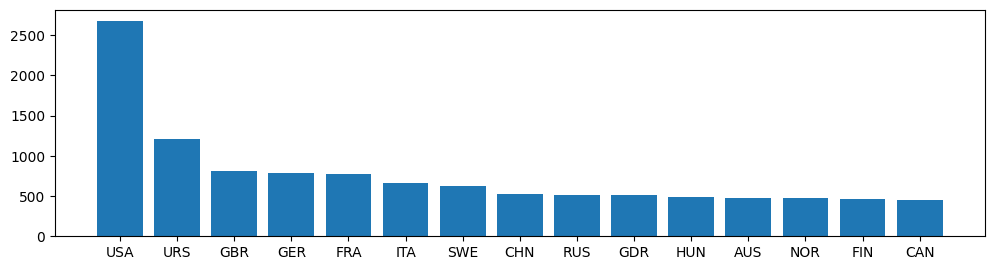

In [ ]:
# Create a bar chart to display 'ID' and 'Combined total'
# Can utilize the script below to ensure the chart looks presentable.
fig, axes = plt.subplots(figsize=(12,3), dpi=100)

x = df3['ID']
y = df3['Combined total']
axes.bar(x, y)